**Importing Libraries**

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

**Gathering Data**

In [3]:
df = pd.read_csv("income.csv")

In [4]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [5]:
df.shape

(48842, 15)

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

**Data Cleaning**

In [7]:
df.isnull().sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
df.dropna()

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

**Dropping Null Values**

1. Removing missing values

In [9]:
missingvalues = ["?","NaN","N/a","NA","na"]
df = pd.read_csv("income.csv", na_values=missingvalues)

In [10]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
5   34    Private  198693          10th                6       Never-married   

          occupation   relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct      Own-child  Black   Male             0             0   
1    Farming-fishing        Husband  White   Male             0             0   
2    Protective-serv        Husband  White   Male             0             0   
3  Machine-op-inspct        Husband  Black   Male          7688             0   
5      Other-service  Not-in-family  White   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
5              30  United-States  <=50K

In [13]:
df.shape

(45222, 15)

In [14]:
value = df['income'].isnull().values.any()
print(value)

False


2. Check if there are any duplicate values

In [15]:
df.duplicated().value_counts()

False    45175
True        47
dtype: int64

2(a) Dropping the 47 duplicate values

In [16]:
df = df.drop_duplicates()

In [17]:
display(df.drop_duplicates())

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
5       34       Private  198693          10th                6   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing        Husband  White    Male   
2      Married-civ-spouse    Protective-serv        Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
5           Never-married      Other-service  Not-in-family  White    Male   
...                   ...                ...            ...    ...     ...   
48837  Married-civ-spouse       Tech-support           Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
48839             Widowed       Adm-clerical      Unmarried  White  Female   
48840       Never-married       Adm-clerical      Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
5                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[45175 rows x 15 columns]

In [18]:
df.shape

(45175, 15)

In [19]:
type(df)

pandas.core.frame.DataFrame

2(b) Dropping the column "fnlgwt" as it doesn't provide any insight from that column

In [20]:
df.drop(df.columns[[2]], axis=1, inplace=True)

In [21]:
df.head()

age  workclass     education  educational-num      marital-status  \
0   25    Private          11th                7       Never-married   
1   38    Private       HS-grad                9  Married-civ-spouse   
2   28  Local-gov    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  Some-college               10  Married-civ-spouse   
5   34    Private          10th                6       Never-married   

          occupation   relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct      Own-child  Black   Male             0             0   
1    Farming-fishing        Husband  White   Male             0             0   
2    Protective-serv        Husband  White   Male             0             0   
3  Machine-op-inspct        Husband  Black   Male          7688             0   
5      Other-service  Not-in-family  White   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
5              30  United-States  <=50K

In [22]:
df.shape

(45175, 14)

**Exploratory Data Analysis**

In [23]:
print(df.dtypes)

age                 int64
workclass          object
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


Text(0.5, 1.0, 'Box Plot for Age')

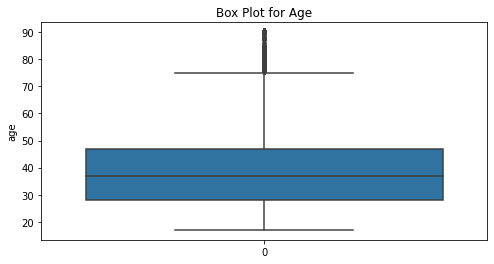

In [24]:
plt.figure(figsize=(8,4))
sns.boxplot(data = df["age"])
plt.ylabel("age")
plt.title("Box Plot for Age")

The median value of age is nearly 38.Also, the values of age is in between 18 and 75 and most of the values are from 28 to 48, which means **most employed persons** have ages in between **28 and 48**.

Text(0.5, 1.0, 'Histogram on Workclass')

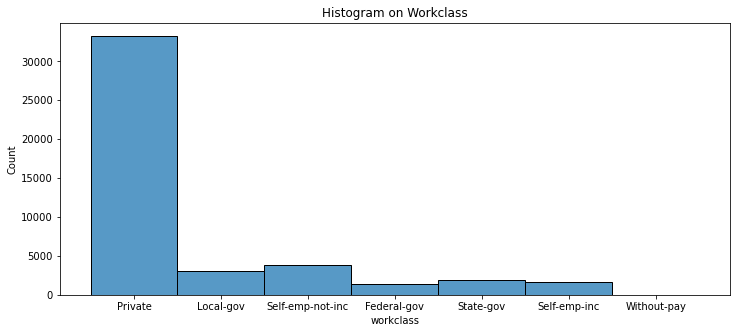

In [25]:
plt.figure(figsize=(12,5))
sns.histplot(data = df, x='workclass')
plt.title("Histogram on Workclass")

Most of the employees are from private sector

<AxesSubplot:ylabel='Categories of Workclass'>

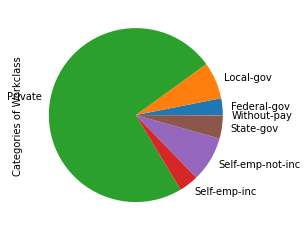

In [26]:
df.groupby('workclass').size().plot(kind='pie', label = "Categories of Workclass")

From the pie-plot, we can derive that most of the employees are from **private sector**.

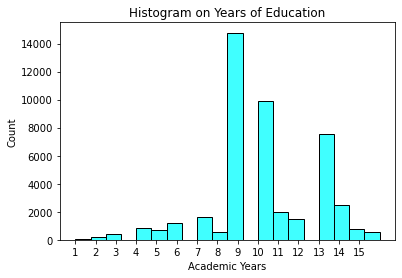

In [27]:
ax = sns.histplot(x= 'educational-num',data = df, color='Cyan',bins=20)
ax.set_xticks(range(1,16))

#specify axis labels
plt.xlabel('Academic Years')
plt.ylabel('Count')
plt.title('Histogram on Years of Education')

#display histogramplot
plt.show()

In [28]:
df['educational-num'].value_counts()

9     14770
10     9887
13     7559
14     2513
11     1958
7      1619
12     1507
6      1223
4       822
15      785
5       676
8       575
16      544
3       447
2       220
1        70
Name: educational-num, dtype: int64

According to the above histogram, nearly **33%** of people have **9 years of academic experience** before starting a job.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Widowed'),
  Text(3, 0, 'Separated'),
  Text(4, 0, 'Divorced'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

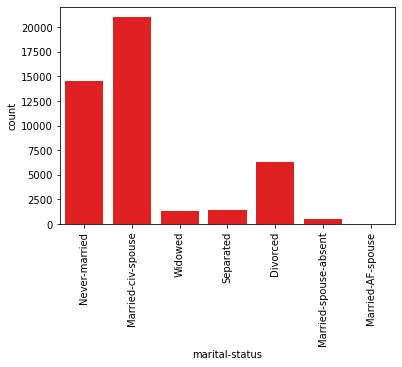

In [29]:
sns.countplot(x= 'marital-status',data = df, color='red')
plt.xticks(rotation=90)

**Married-civ-spouse** means married and is a spouse of civilian are the **highest number** of people with a job.

[Text(0, 0.5, 'Education Background'),
 Text(0.5, 1.0, 'Bar plot on different Educations')]

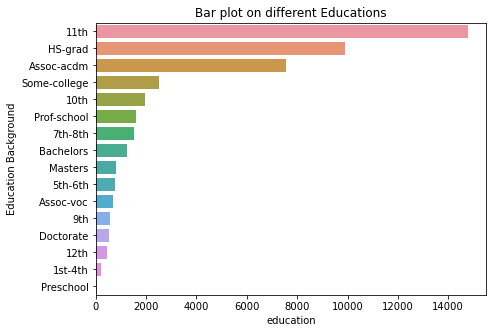

In [30]:
plt.figure(figsize=(7,5))
sns.barplot(y = df['education'].unique(),x = df['education'].value_counts()).set(ylabel = "Education Background",title = "Bar plot on different Educations")

Based on the barplot, the **minimum education** of any person that landed in a job is **11th standard**.

<AxesSubplot:xlabel='age', ylabel='income'>

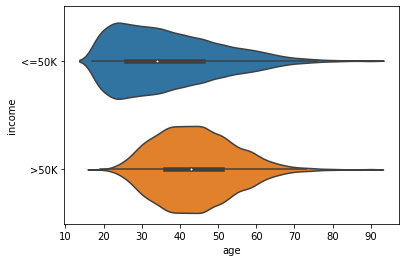

In [31]:
sns.violinplot(y = df['income'], x = df['age'])

Individuals between the ages of **23 and 46** are most likely to have an **income of less than or equal to 50K**, according to the violin plot. Furthermore, people begin **earning more than 50K at the age of 35 and continue to do so until they are 52**.

[Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Occupation'),
 Text(0.5, 1.0, 'Bar plot on different Occupations')]

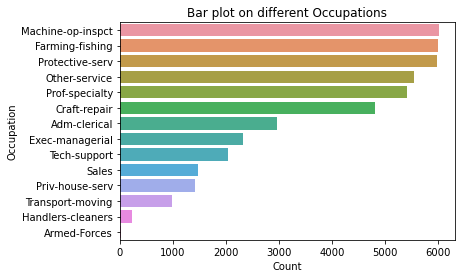

In [32]:
sns.barplot(y = df['occupation'].unique(),x = df['occupation'].value_counts()).set(xlabel = "Count", ylabel = "Occupation",title = "Bar plot on different Occupations")

From the above findings,almost **40% jobs** are available for machine operator and inspector, farming-fishing and Protective Service roles and people working for it.

Text(0.5, 1.0, 'KDE on Capital Loss')

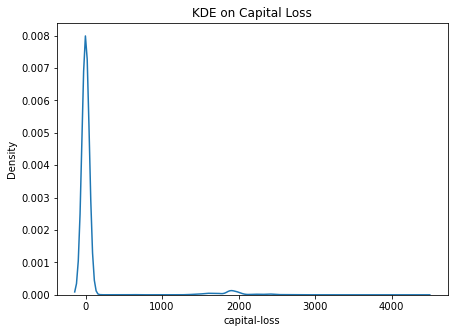

In [33]:
plt.figure(figsize=(7,5))
sns.kdeplot(df['capital-loss'])
plt.title("KDE on Capital Loss")

From the Kernel Density Estimation, it is clear that there are **no outliers** for the Capital loss column. Also, the mean values is near zero which means that there is **no loss incurred by individuals** from the sale of a capital asset, such as a stock, bond, or real estate.

<AxesSubplot:xlabel='age', ylabel='income'>

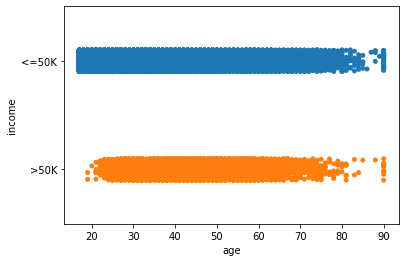

In [34]:
sns.stripplot(x = df['age'], y = df['income'])

From the strip plot, people with **age less than 20 and more than 70** mostly have income less than 50K.

Text(0.5, 1.0, 'Heat Map of all the Quantitative Values')

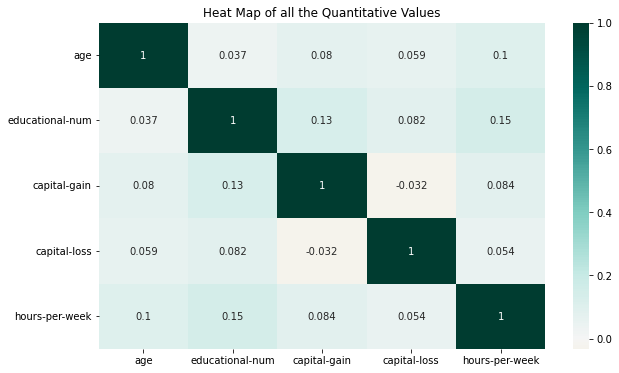

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)
plt.title("Heat Map of all the Quantitative Values")

From the heat map, we can say that there is no much correlation between the quantitative variables, but there is least correlation in few columns which are **educational-num** and **hours-per-week**, **capital-gain** and **educational-num** & **age** and **hours-per-week**.

Text(0.5, 1.0, 'Relation between Age and Hours per Week')

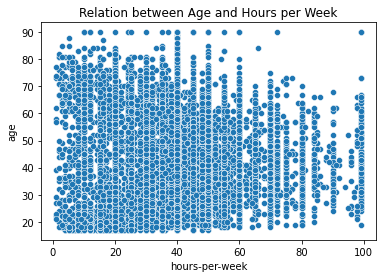

In [36]:
sns.scatterplot(data = df, x ="hours-per-week", y="age")
plt.title("Relation between Age and Hours per Week")

People above **80** years of age spend less time working over week.

Text(0.5, 1.0, 'Line plot on Hours spent on work for a week by an Individual')

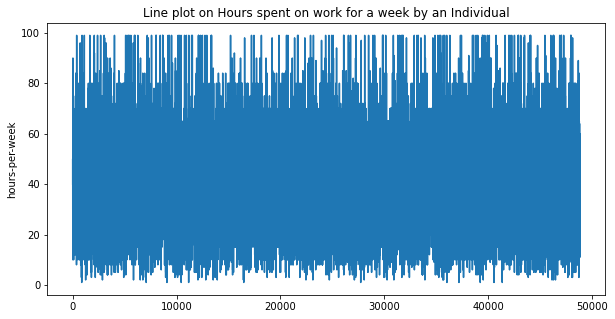

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df['hours-per-week'])
plt.title("Line plot on Hours spent on work for a week by an Individual")

Almost every individual spends **10 to 70 hours** in a week on their job.

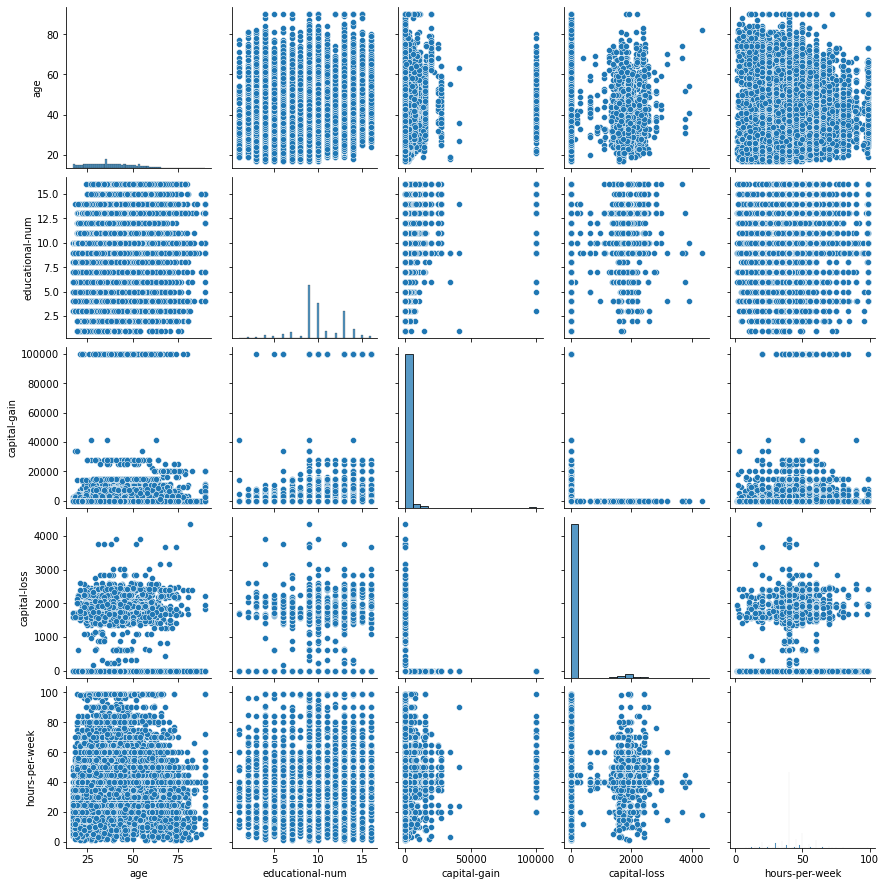

In [38]:
sns.pairplot(data = df)

**API EXTRACTION AND CONVERTING TO VECTORIZED DATA**

In [39]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [40]:
import requests

url = ('https://newsapi.org/v2/everything?''q=adults income&''apiKey=18071091481841b1910d5ae638bfef59')

response = requests.get(url)

print(response.json)

<bound method Response.json of <Response [200]>>


In [41]:
jsontxt = response.json()

In [42]:
response.content

b'{"status":"ok","totalResults":1516,"articles":[{"source":{"id":null,"name":"The Guardian"},"author":"Torsten Bell","title":"Want to solve the falling birthrate? Just remember that raising children is expensive | Torsten Bell","description":"When people fear for their jobs and the financial safety net is inadequate, is it any wonder they are having smaller families?We\xe2\x80\x99re having fewer babies. Peak fertility in postwar England and Wales was 2.93 children per woman in 1964, but that has dropped to 1\xe2\x80\xa6","url":"https://www.theguardian.com/commentisfree/2023/feb/19/want-to-solve-the-falling-birthrate-remember-raising-children-is-expensive","urlToImage":"https://i.guim.co.uk/img/media/418e73962e2028f78736123af9986908b82ee7db/0_0_5000_2999/master/5000.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdG8tb3BpbmlvbnMucG5n&enable=upscale&s=1e1a974f2d210866a1170761113d3822","pub

In [43]:
filename="Adult_Income_Headlines.csv"
MyFILE=open(filename,"w")
WriteThis="Date,Source,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [44]:
MyFILE=open(filename, "a")

In [45]:
import re
for items in jsontxt["articles"]:
    Source=items["source"]["id"]    
    Date=items["publishedAt"]
    NewDate=Date.split("T")
    Date=NewDate[0]
    ## CLEAN the Title
    ##Replace punctuation with space
    # Accept one or more copies of punctuation         
    # plus zero or more copies of a space
    # and replace it with a single space
    Title=items["title"]
    Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', Title, flags=re.IGNORECASE)
    Title=re.sub(' +', ' ', Title, flags=re.IGNORECASE)
    Title=re.sub(r'\"', ' ', Title, flags=re.IGNORECASE)
    
    # and replace it with a single space
    ## NOTE: Using the "^" on the inside of the [] means
    ## we want to look for any chars NOT a-z or A-Z and replace
    ## them with blank. This removes chars that should not be there.
    Title=re.sub(r'[^a-zA-Z]', " ", Title, flags=re.VERBOSE)
    Title=Title.replace(',', '')
    Title=' '.join(Title.split())
    Title=re.sub("\n|\r", "", Title)
    ##----------------------------------------------------------
    
    Headline=items["description"]
    Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
    ## Be sure there are no commas in the headlines or it will
    ## write poorly to a csv file....
    Headline=Headline.replace(',', '')
    Headline=' '.join(Headline.split())
    Headline=re.sub("\n|\r", "", Headline)
    
    ### AS AN OPTION - remove words of a given length............
    Headline = ' '.join([wd for wd in Headline.split() if len(wd)>3])
    WriteThis=str(Date)+","+str(Source)+","+ str(Title) + "," + str(Headline) + "\n"
    
    MyFILE.write(WriteThis)
    
## CLOSE THE FILE
MyFILE.close()

In [46]:
adult_income_api = pd.read_csv(filename, error_bad_lines=False)
print(adult_income_api.head())
# iterating the columns 
for col in adult_income_api.columns: 
    print(col) 
    
print(adult_income_api["Headline"])

## REMOVE any rows with NaN in them
adult_income_api = adult_income_api.dropna()
print(adult_income_api["Headline"])

### Tokenize and Vectorize the Headlines
## Create the list of headlines
HeadlineLIST = []
for next1 in adult_income_api["Headline"]:
    HeadlineLIST.append(next1)

print("The headline list is")
print(HeadlineLIST)

         Date            Source  \
0  2023-02-19              None   
1  2023-03-07              time   
2  2023-03-06          abc-news   
3  2023-03-05  business-insider   
4  2023-03-14              None   

                                               Title  \
0  Want to solve the falling birthrate Just remem...   
1  Biden Plans to Raise Taxes on the Richest Amer...   
2          dead in Illinois home invasion police say   
3  Over million workers are missing from the US w...   
4  So many working parents are screwed mothers on...   

                                            Headline  
0  When people fear their jobs financial safety i...  
1  Medicare rate would rise from income exceeding...  
2  adults juvenile were killed home invasion Sund...  
3  Some people have resorted living with their pa...  
4  Parents describe plight pressure builds Jeremy...  
Date
Source
Title
Headline
0     When people fear their jobs financial safety i...
1     Medicare rate would rise from inc

C:\Users\akith\AppData\Local\Temp\ipykernel_25988\1061693948.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  adult_income_api = pd.read_csv(filename, error_bad_lines=False)


In [47]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

In [50]:
import numpy as np
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc


normalize_corpus = np.vectorize(normalize_document)

In [51]:
norm_corpus = normalize_corpus(HeadlineLIST)

In [52]:
temp = pd.DataFrame()

In [53]:
temp_1 = temp.append(norm_corpus[0].split()).T
for i in range(1,len(norm_corpus)):
    temp_2 = temp.append(norm_corpus[i].split()).T
    temp_1 = pd.concat([temp_1,temp_2])

C:\Users\akith\AppData\Local\Temp\ipykernel_25988\1722674452.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_1 = temp.append(norm_corpus[0].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\U

C:\Users\akith\AppData\Local\Temp\ipykernel_25988\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\U

C:\Users\akith\AppData\Local\Temp\ipykernel_25988\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\1722674452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_2 = temp.append(norm_corpus[i].split()).T
C:\U

In [54]:
temp_1['label'] = 'Adults_Income'
temp_1

0          1        2          3          4             5  \
0         people       fear     jobs  financial     safety    inadequate   
0       medicare       rate    would       rise     income     exceeding   
0         adults   juvenile   killed       home   invasion        sunday   
0         people   resorted   living    parents      cases       parents   
0        parents   describe   plight   pressure     builds        jeremy   
..           ...        ...      ...        ...        ...           ...   
0       research   revealed     half     adults       feel          need   
0   nirogacestat     adults  desmoid     tumors   accepted       granted   
0         bemoan  emotional    state       need  determine     happiness   
0       parental     income     best  predictor   children      outcomes   
0         anchor      lemon    found      water  described  presidential   

            6          7         8             9  ...       19       20  \
0      wonder    smaller  families         fewer  ...      NaN      NaN   
0        year       full   details          plan  ...      NaN      NaN   
0    illinois     police      said   bolingbrook  ...      NaN      NaN   
0       moved       kids       NaN           NaN  ...      NaN      NaN   
0        hunt    provide      help  budgetjoanna  ...  britain  current   
..        ...        ...       ...           ...  ...      ...      ...   
0     another      order      feel   comfortable  ...      NaN      NaN   
0    priority     review     pdufa        action  ...      NaN      NaN   
0         NaN        NaN       NaN           NaN  ...      NaN      NaN   
0        post  attention     class      appeared  ...      NaN      NaN   
0   candidate      nikki     haley         prime  ...      NaN      NaN   

           21     22      23   24   25   26   27          label  
0         NaN    NaN     NaN  NaN  NaN  NaN  NaN  Adults_Income  
0         NaN    NaN     NaN  NaN  NaN  NaN  NaN  Adults_Income  
0         NaN    NaN     NaN  NaN  NaN  NaN  NaN  Adults_Income  
0         NaN    NaN     NaN  NaN  NaN  NaN  NaN  Adults_Income  
0   childcare  offer  simply  NaN  NaN  NaN  NaN  Adults_Income  
..        ...    ...     ...  ...  ...  ...  ...            ...  
0         NaN    NaN     NaN  NaN  NaN  NaN  NaN  Adults_Income  
0         NaN    NaN     NaN  NaN  NaN  NaN  NaN  Adults_Income  
0         NaN    NaN     NaN  NaN  NaN  NaN  NaN  Adults_Income  
0         NaN    NaN     NaN  NaN  NaN  NaN  NaN  Adults_Income  
0         NaN    NaN     NaN  NaN  NaN  NaN  NaN  Adults_Income  

[100 rows x 29 columns]

**ADULTS INCOME & EDUCATION**

In [55]:
import requests

url = ('https://newsapi.org/v2/everything?''q=education&''apiKey=18071091481841b1910d5ae638bfef59')

response = requests.get(url)

print(response.json)

<bound method Response.json of <Response [200]>>


In [56]:
jsontxt = response.json()

In [57]:
filename="Education_headlines.csv"
MyFILE=open(filename,"w")
WriteThis="Date,Source,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [58]:
MyFILE=open(filename, "a")

In [59]:
import re

for items in jsontxt["articles"]:
    Source=items["source"]["id"]    
    Date=items["publishedAt"]
    NewDate=Date.split("T")
    Date=NewDate[0]
    ## CLEAN the Title
    ##Replace punctuation with space
    # Accept one or more copies of punctuation         
    # plus zero or more copies of a space
    # and replace it with a single space
    Title=items["title"]
    Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', Title, flags=re.IGNORECASE)
    Title=re.sub(' +', ' ', Title, flags=re.IGNORECASE)
    Title=re.sub(r'\"', ' ', Title, flags=re.IGNORECASE)
    
    # and replace it with a single space
    ## NOTE: Using the "^" on the inside of the [] means
    ## we want to look for any chars NOT a-z or A-Z and replace
    ## them with blank. This removes chars that should not be there.
    Title=re.sub(r'[^a-zA-Z]', " ", Title, flags=re.VERBOSE)
    Title=Title.replace(',', '')
    Title=' '.join(Title.split())
    Title=re.sub("\n|\r", "", Title)
    ##----------------------------------------------------------
    
    Headline=items["description"]
    Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
    ## Be sure there are no commas in the headlines or it will
    ## write poorly to a csv file....
    Headline=Headline.replace(',', '')
    Headline=' '.join(Headline.split())
    Headline=re.sub("\n|\r", "", Headline)
    
    ### AS AN OPTION - remove words of a given length............
    Headline = ' '.join([wd for wd in Headline.split() if len(wd)>3])
    WriteThis=str(Date)+","+str(Source)+","+ str(Title) + "," + str(Headline) + "\n"
    
    MyFILE.write(WriteThis)
    
## CLOSE THE FILE
MyFILE.close()

In [60]:
education_api = pd.read_csv(filename, error_bad_lines=False)
print(education_api.head())
# iterating the columns 
for col in education_api.columns: 
    print(col) 
    
print(education_api["Headline"])

## REMOVE any rows with NaN in them
education_api = education_api.dropna()
print(education_api["Headline"])

### Tokenize and Vectorize the Headlines
## Create the list of headlines
HeadlineLIST=[]
for next1 in education_api["Headline"]:
    HeadlineLIST.append(next1)

print("The headline list is")
print(HeadlineLIST)

         Date    Source                                              Title  \
0  2023-03-06     wired  Startups Want to Cash In on the US Student Deb...   
1  2023-03-05  bbc-news  Irish Traveller culture could be promoted in s...   
2  2023-03-06      None       How to Be a Digital Nomad When You Have Kids   
3  2023-02-24       cnn  Florida bill would give DeSantis more power ov...   
4  2023-03-02     wired  Survivors Suffer When Judges Misunderstand Soc...   

                                            Headline  
0  Companies like SoFi Chipper offer help people ...  
1  Research presents their history culture could ...  
2  pandemic proved that remote work work while co...  
3  bill overhauling Florida universities match De...  
4  sexual assault cases complainant fate depend j...  
Date
Source
Title
Headline
0     Companies like SoFi Chipper offer help people ...
1     Research presents their history culture could ...
2     pandemic proved that remote work work while co...
3     

C:\Users\akith\AppData\Local\Temp\ipykernel_25988\1841685384.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  education_api = pd.read_csv(filename, error_bad_lines=False)


In [61]:
norm_corpus = normalize_corpus(HeadlineLIST)

In [62]:
norm_corpus

array(['companies like sofi chipper offer help people manage college loans likely flawed economics education',
       'research presents history culture could introduced irish education',
       'pandemic proved remote work work companies increasingly requiring return office nearly million americans considered digital nomads work travel time increase',
       'bill overhauling florida universities match desantis vision higher education would shift power state schools hands republican leader political appointees gender studies field study',
       'sexual assault cases complainant fate depend judge awareness various online communications platforms work',
       'free education equal rights unmarried women among proposals reuters',
       'gauff weighs florida education debate reuters',
       'government education unions begin intensive talks reuters',
       'three years mandatory education introduced results show issue unsafe relationships also taught sufficientlystudents taught enoug

In [63]:
temp = pd.DataFrame()

In [64]:
temp_3 = temp.append(norm_corpus[0].split()).T
for i in range(1,len(norm_corpus)):
    temp_4 = temp.append(norm_corpus[i].split()).T
    temp_3 = pd.concat([temp_3,temp_4])

C:\Users\akith\AppData\Local\Temp\ipykernel_25988\3651831735.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_3 = temp.append(norm_corpus[0].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\U

C:\Users\akith\AppData\Local\Temp\ipykernel_25988\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\U

C:\Users\akith\AppData\Local\Temp\ipykernel_25988\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\Users\akith\AppData\Local\Temp\ipykernel_25988\3651831735.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_4 = temp.append(norm_corpus[i].split()).T
C:\U

In [65]:
temp_3['label'] = 'Education'
temp_3

0            1         2                  3            4  \
0   companies         like      sofi            chipper        offer   
0    research     presents   history            culture        could   
0    pandemic       proved    remote               work         work   
0        bill  overhauling   florida       universities        match   
0      sexual      assault     cases        complainant         fate   
..        ...          ...       ...                ...          ...   
0   arguments        biden   student               loan  forgiveness   
0   botanists    community  stewards              using      patches   
0     supreme        court   wrapped          arguments      student   
0     supreme        court      rule  constitutionality    president   
0    pressley         told   insider              still      supreme   

             5             6           7             8         9  ...  \
0         help        people      manage       college     loans  ...   
0   introduced         irish   education           NaN       NaN  ...   
0    companies  increasingly   requiring        return    office  ...   
0     desantis        vision      higher     education     would  ...   
0       depend         judge   awareness       various    online  ...   
..         ...           ...         ...           ...       ...  ...   
0         took         place     tuesday  conservative   supreme  ...   
0       native         flora  blueprints        revive  tropical  ...   
0         loan   forgiveness     payment    resumption   depends  ...   
0        biden          debt      relief          plan      look  ...   
0        court        uphold       biden       student      loan  ...   

            18        19       20     21     22   23   24   25   26      label  
0          NaN       NaN      NaN    NaN    NaN  NaN  NaN  NaN  NaN  Education  
0          NaN       NaN      NaN    NaN    NaN  NaN  NaN  NaN  NaN  Education  
0         time  increase      NaN    NaN    NaN  NaN  NaN  NaN  NaN  Education  
0   appointees    gender  studies  field  study  NaN  NaN  NaN  NaN  Education  
0          NaN       NaN      NaN    NaN    NaN  NaN  NaN  NaN  NaN  Education  
..         ...       ...      ...    ...    ...  ...  ...  ...  ...        ...  
0          NaN       NaN      NaN    NaN    NaN  NaN  NaN  NaN  NaN  Education  
0          NaN       NaN      NaN    NaN    NaN  NaN  NaN  NaN  NaN  Education  
0          NaN       NaN      NaN    NaN    NaN  NaN  NaN  NaN  NaN  Education  
0          NaN       NaN      NaN    NaN    NaN  NaN  NaN  NaN  NaN  Education  
0          NaN       NaN      NaN    NaN    NaN  NaN  NaN  NaN  NaN  Education  

[100 rows x 28 columns]

In [66]:
transactiondata = pd.concat([temp_1,temp_3])

In [67]:
transactiondata

0          1         2                  3            4  \
0      people       fear      jobs          financial       safety   
0    medicare       rate     would               rise       income   
0      adults   juvenile    killed               home     invasion   
0      people   resorted    living            parents        cases   
0     parents   describe    plight           pressure       builds   
..        ...        ...       ...                ...          ...   
0   arguments      biden   student               loan  forgiveness   
0   botanists  community  stewards              using      patches   
0     supreme      court   wrapped          arguments      student   
0     supreme      court      rule  constitutionality    president   
0    pressley       told   insider              still      supreme   

             5            6           7             8             9  ...  \
0   inadequate       wonder     smaller      families         fewer  ...   
0    exceeding         year        full       details          plan  ...   
0       sunday     illinois      police          said   bolingbrook  ...   
0      parents        moved        kids           NaN           NaN  ...   
0       jeremy         hunt     provide          help  budgetjoanna  ...   
..         ...          ...         ...           ...           ...  ...   
0         took        place     tuesday  conservative       supreme  ...   
0       native        flora  blueprints        revive      tropical  ...   
0         loan  forgiveness     payment    resumption       depends  ...   
0        biden         debt      relief          plan          look  ...   
0        court       uphold       biden       student          loan  ...   

         19       20         21     22      23   24   25   26   27  \
0       NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN   
0       NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN   
0       NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN   
0       NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN   
0   britain  current  childcare  offer  simply  NaN  NaN  NaN  NaN   
..      ...      ...        ...    ...     ...  ...  ...  ...  ...   
0       NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN   
0       NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN   
0       NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN   
0       NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN   
0       NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN   

            label  
0   Adults_Income  
0   Adults_Income  
0   Adults_Income  
0   Adults_Income  
0   Adults_Income  
..            ...  
0       Education  
0       Education  
0       Education  
0       Education  
0       Education  

[200 rows x 29 columns]

In [68]:
transactiondata = transactiondata.iloc[: , :-1]

In [69]:
transactiondata.to_csv("transactions_data.csv", index = False, header = False)

In [70]:
transactiondata

0          1         2                  3            4   \
0      people       fear      jobs          financial       safety   
0    medicare       rate     would               rise       income   
0      adults   juvenile    killed               home     invasion   
0      people   resorted    living            parents        cases   
0     parents   describe    plight           pressure       builds   
..        ...        ...       ...                ...          ...   
0   arguments      biden   student               loan  forgiveness   
0   botanists  community  stewards              using      patches   
0     supreme      court   wrapped          arguments      student   
0     supreme      court      rule  constitutionality    president   
0    pressley       told   insider              still      supreme   

            5            6           7             8             9   ...  \
0   inadequate       wonder     smaller      families         fewer  ...   
0    exceeding         year        full       details          plan  ...   
0       sunday     illinois      police          said   bolingbrook  ...   
0      parents        moved        kids           NaN           NaN  ...   
0       jeremy         hunt     provide          help  budgetjoanna  ...   
..         ...          ...         ...           ...           ...  ...   
0         took        place     tuesday  conservative       supreme  ...   
0       native        flora  blueprints        revive      tropical  ...   
0         loan  forgiveness     payment    resumption       depends  ...   
0        biden         debt      relief          plan          look  ...   
0        court       uphold       biden       student          loan  ...   

         18       19       20         21     22      23   24   25   26   27  
0   dropped      NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN  
0       NaN      NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN  
0       NaN      NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN  
0       NaN      NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN  
0   parents  britain  current  childcare  offer  simply  NaN  NaN  NaN  NaN  
..      ...      ...      ...        ...    ...     ...  ...  ...  ...  ...  
0       NaN      NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN  
0       NaN      NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN  
0       NaN      NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN  
0       NaN      NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN  
0       NaN      NaN      NaN        NaN    NaN     NaN  NaN  NaN  NaN  NaN  

[200 rows x 28 columns]

**K-Means Clustering**

In [71]:
df.to_csv("df.csv", index = False)

In [72]:
numeric_df = df[['age','educational-num','capital-gain','capital-loss','hours-per-week']]
num_df = df[['age','educational-num','capital-gain','capital-loss','hours-per-week','income']]

In [73]:
numeric_df

age  educational-num  capital-gain  capital-loss  hours-per-week
0       25                7             0             0              40
1       38                9             0             0              50
2       28               12             0             0              40
3       44               10          7688             0              40
5       34                6             0             0              30
...    ...              ...           ...           ...             ...
48837   27               12             0             0              38
48838   40                9             0             0              40
48839   58                9             0             0              40
48840   22                9             0             0              20
48841   52                9         15024             0              40

[45175 rows x 5 columns]

In [74]:
numeric_df.to_csv("numeric_df.csv", index = False)
num_df.to_csv("num_df.csv", index = False)

In [75]:
from sklearn.preprocessing import StandardScaler 
numeric_df = StandardScaler().fit_transform(numeric_df)

In [76]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(numeric_df)
    kmeanModel.fit(numeric_df)
  
    distortions.append(sum(np.min(cdist(numeric_df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / numeric_df.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(numeric_df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / numeric_df.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [77]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.7839121745166706
2 : 1.6188644935651826
3 : 1.5540852731070165
4 : 1.3470321875727955
5 : 1.1984230373190896
6 : 1.115994471756412
7 : 1.0293249333203147
8 : 0.9741121171613553
9 : 0.931740857853006


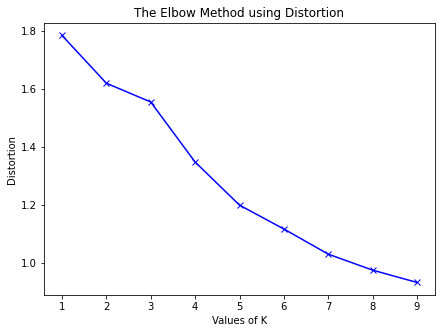

In [78]:
plt.figure(figsize=(7,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

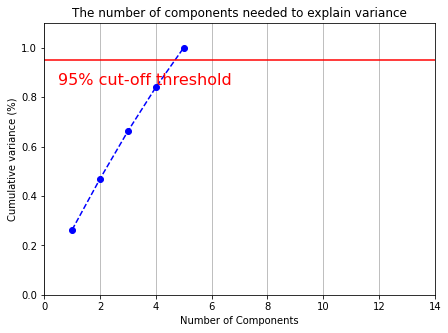

In [79]:
from sklearn.decomposition import PCA

pca = PCA().fit(numeric_df)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)

fig, ax = plt.subplots()
xi = np.arange(1, 6, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 15, step=2)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [80]:
#PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(numeric_df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

Text(0.5, 1.0, 'K-Means Clustering based on K=4')

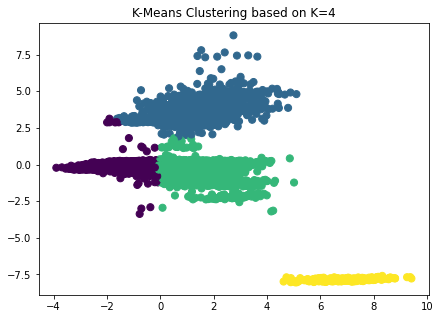

In [81]:
plt.figure(figsize=(7,5))
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(principalDf)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c = label, s= 50, cmap = 'viridis' )
plt.title("K-Means Clustering based on K=4")

Text(0.5, 1.0, 'K-Means Clustering based on K=2')

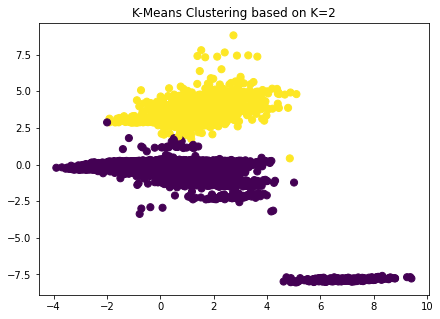

In [82]:
plt.figure(figsize=(7,5))
kmeans = KMeans(n_clusters = 2)
label = kmeans.fit_predict(principalDf)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c = label, s= 50, cmap = 'viridis' )
plt.title("K-Means Clustering based on K=2")

Text(0.5, 1.0, 'K-Means Clustering based on K=3')

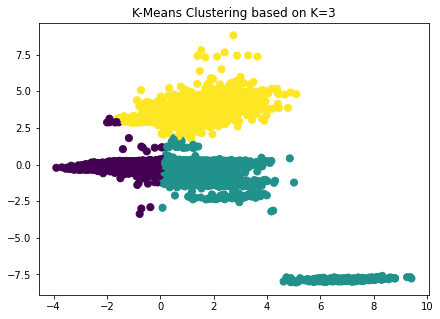

In [83]:
plt.figure(figsize=(7,5))
kmeans = KMeans(n_clusters = 3)
label = kmeans.fit_predict(principalDf)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c = label, s= 50, cmap = 'viridis' )
plt.title("K-Means Clustering based on K=3")

In [84]:
type(numeric_df)

numpy.ndarray

In [85]:
numeric_df.shape

(45175, 5)

In [86]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [87]:
numeric_df, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=None)

In [88]:
true_labels[:20]

array([0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 0, 0])

In [89]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df)

In [90]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

In [91]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [92]:
kmeans.inertia_

127.54409929082442

In [93]:
kmeans.cluster_centers_

array([[-0.76375475,  0.39811713],
       [ 1.18924444,  0.87652373],
       [-0.47979043, -0.9256717 ]])

In [94]:
kmeans.n_iter_

7

In [95]:
kmeans.labels_[:5]

array([0, 0, 0, 2, 1])

In [96]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(scaled_features)
 sse.append(kmeans.inertia_)

C:\Users\akith\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


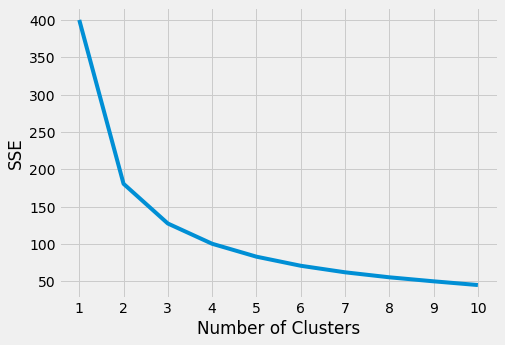

In [97]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [98]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [99]:
kl.elbow

3

In [100]:
 # A list holds the silhouette coefficients for each k
silhouette_coefficients = []
 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

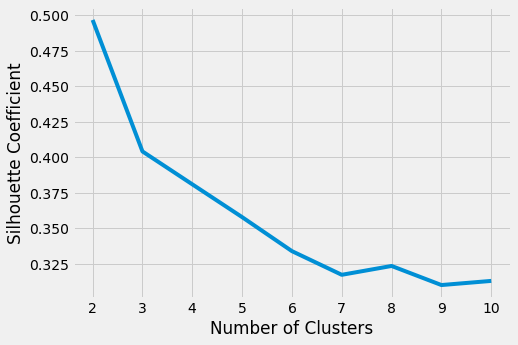

In [101]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [102]:
# Fit the algorithms to the features
kmeans.fit(scaled_features)
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)

In [103]:
kmeans_silhouette

0.31

**DECISION TREES**

**1. Decision Tree wrt GINI**

In [104]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [105]:
pip install graphviz

In [106]:
dt_numeric = df[['age','educational-num','hours-per-week','workclass']]

In [107]:
dt_numeric.to_csv("dt_numeric.csv", index = False)

In [108]:
dt_numeric

age  educational-num  hours-per-week     workclass
0       25                7              40       Private
1       38                9              50       Private
2       28               12              40     Local-gov
3       44               10              40       Private
5       34                6              30       Private
...    ...              ...             ...           ...
48837   27               12              38       Private
48838   40                9              40       Private
48839   58                9              40       Private
48840   22                9              20       Private
48841   52                9              40  Self-emp-inc

[45175 rows x 4 columns]

In [109]:
import sklearn
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [110]:
X_train, X_test, y_train, y_test = train_test_split(dt_numeric.iloc[:,:-1], dt_numeric.iloc[:, -1], test_size=0.3)

In [111]:
X_train

age  educational-num  hours-per-week
48254   23               10              20
25912   38                9              40
12058   38               10              30
41161   58                9              38
12149   43               13              38
...    ...              ...             ...
45470   40               14              20
18828   26               10              35
2242    52                9              44
29348   48                9              36
26173   24                9              55

[31622 rows x 3 columns]

In [112]:
X_test

age  educational-num  hours-per-week
16970   26                9              30
36748   58               10              40
3699    30                6              40
41501   29                9              40
12002   27               10              49
...    ...              ...             ...
44381   58               10              12
43577   23                7              50
1090    63               10              60
20491   36               12              48
6080    43                9              37

[13553 rows x 3 columns]

In [113]:
model_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=4, min_samples_leaf=3)
model_gini.fit(X_train, y_train)
predictions = model_gini.predict(X_test)
predictions[1:10]

array(['Private', 'Private', 'Private', 'Private', 'Private', 'Private',
       'Private', 'Private', 'Private'], dtype=object)

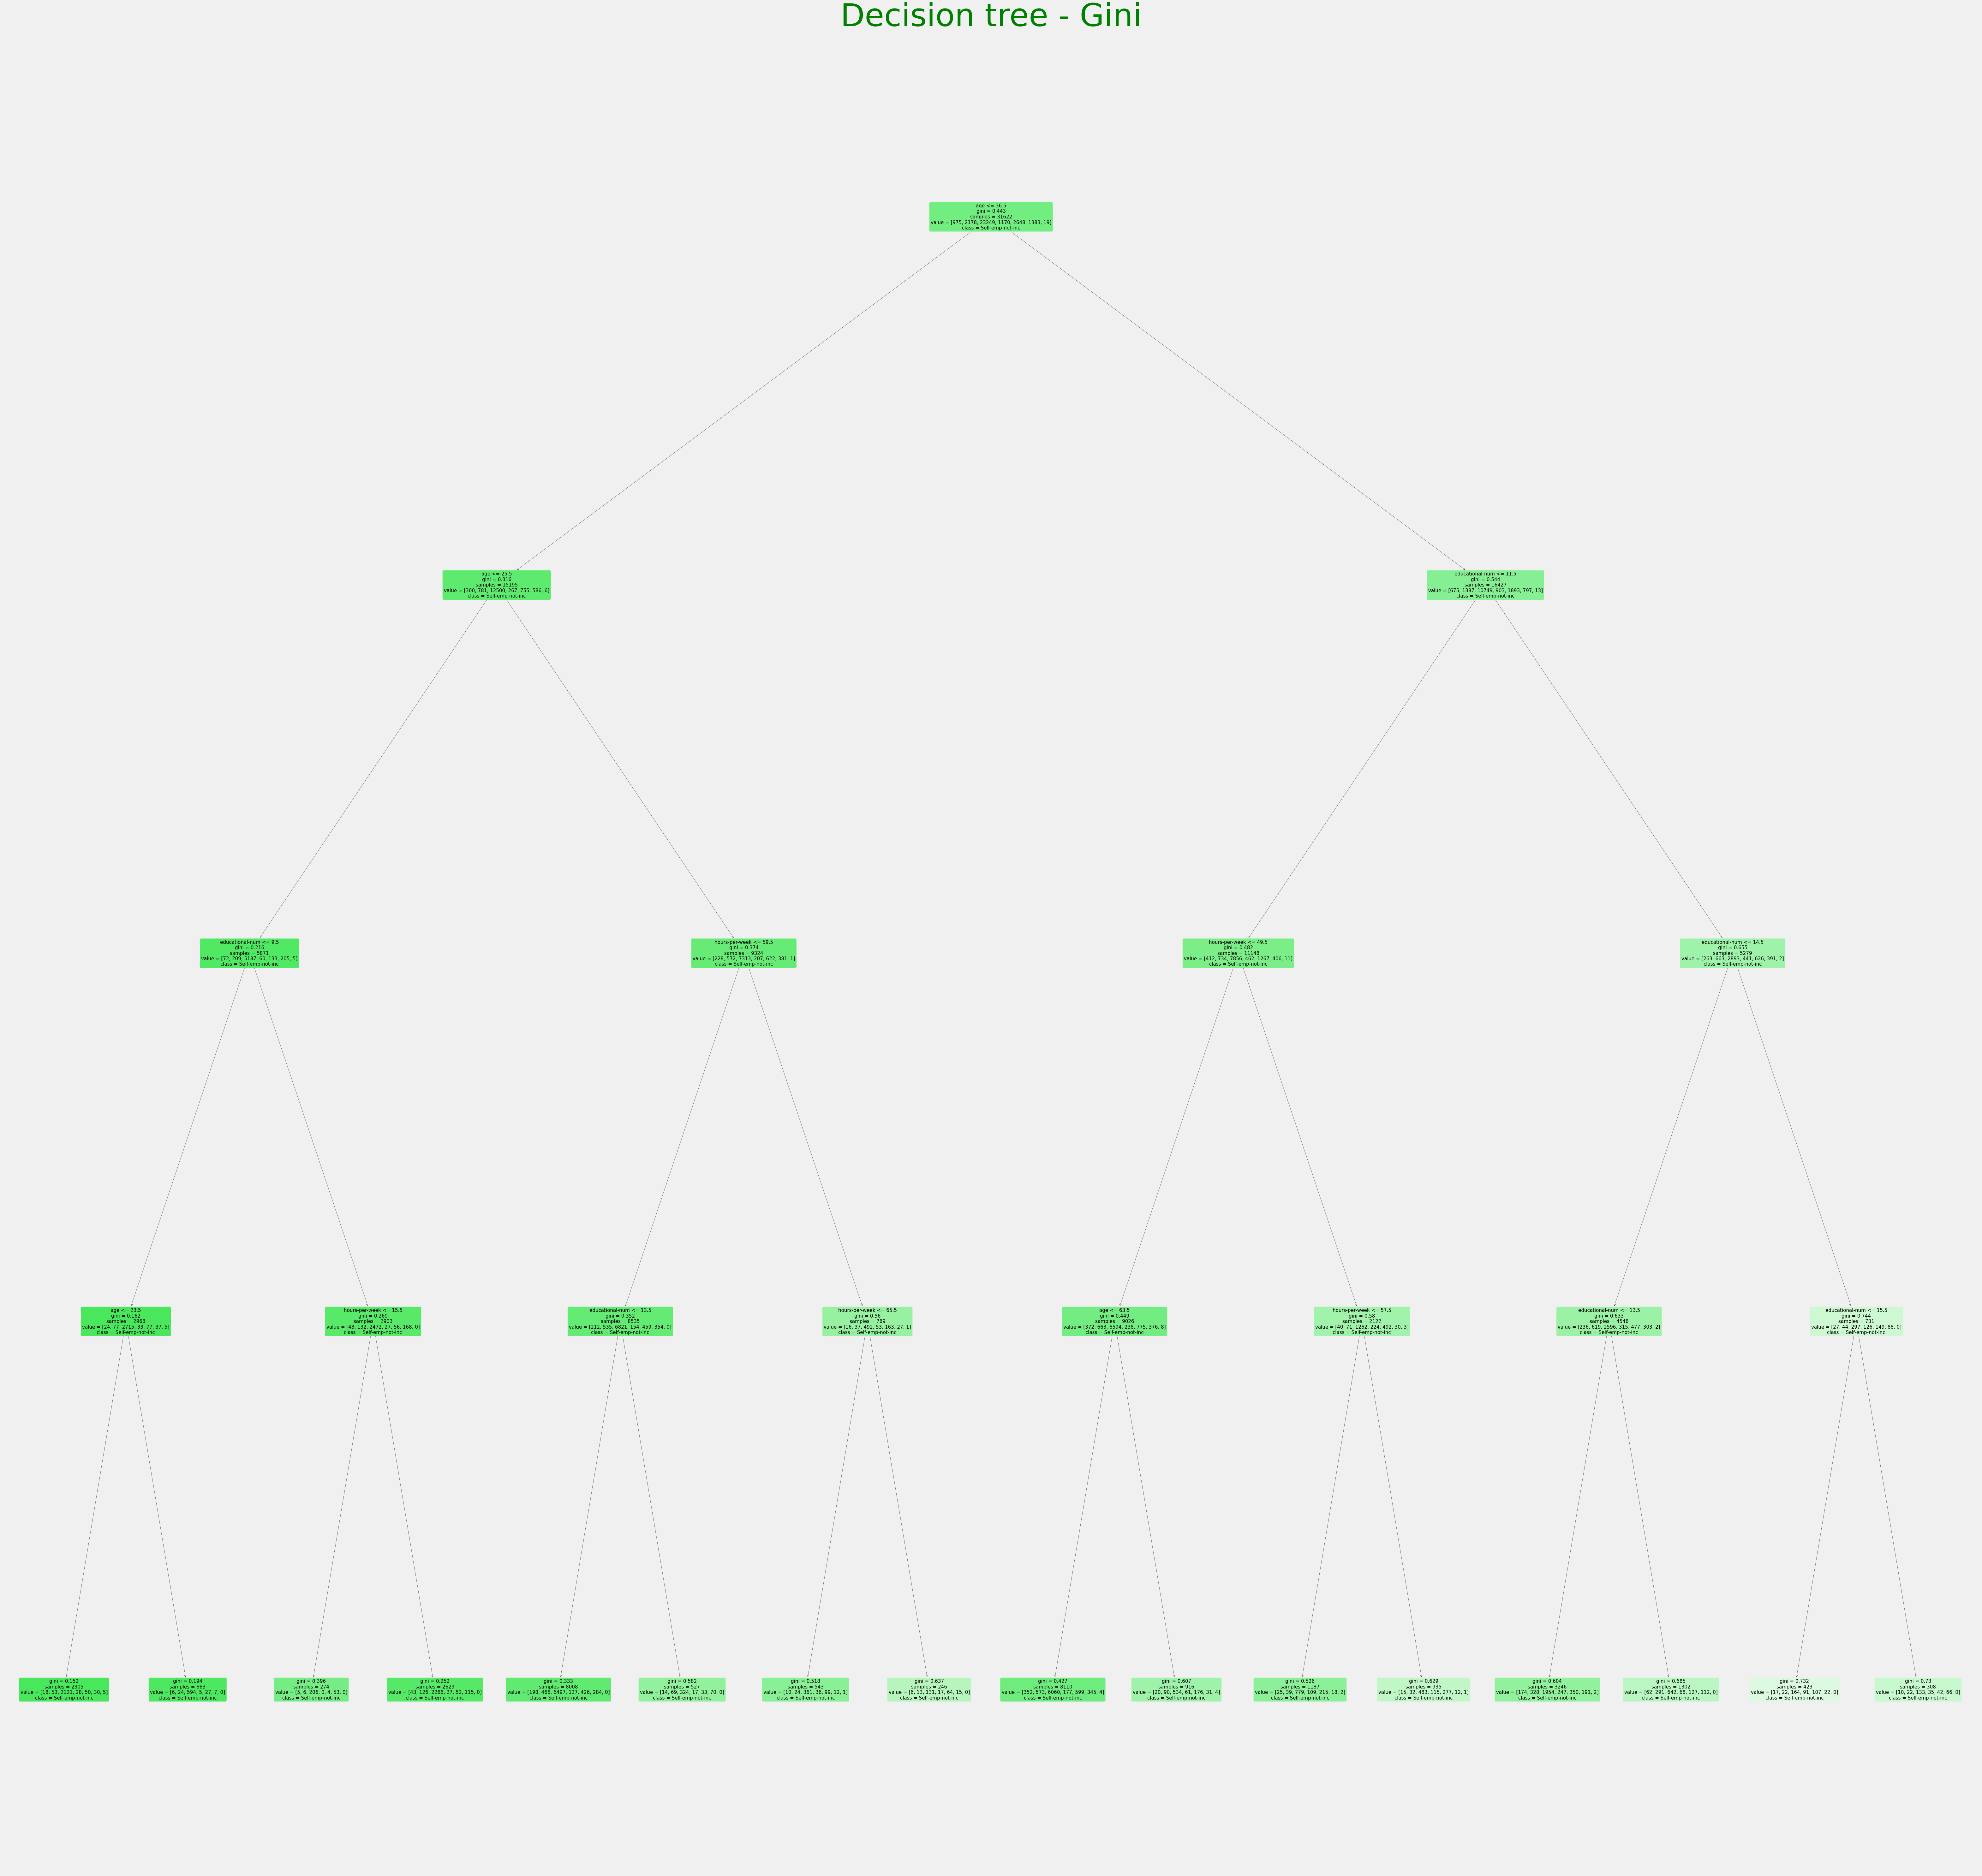

In [114]:
# Visualizing the decision tree
#fig = plt.figure(figsize=(25,30))
#_ = tree.plot_tree(model_gini, feature_names=dt_numeric.iloc[:,:-1].columns, class_names=dt_numeric['workclass'], filled = True)
feature_names = dt_numeric.columns[:6]
target_names = dt_numeric['workclass'].unique().tolist()
plt.figure(figsize=(100,100))
plot_tree(model_gini, feature_names = feature_names, class_names = target_names, filled = True, rounded = True)
plt.title(label="Decision tree - Gini",fontsize=100,color="green")
plt.savefig('DT - Gini .png')

In [115]:
#fig.savefig("decistion_tree_Gini.png")

In [116]:
# Deriving confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))
print ("Accuracy : ", accuracy_score(y_test,predictions)*100)      
print("Report : ", classification_report(y_test, predictions))

Confusion Matrix: 
 [[    0     0   431     0     0     0     0]
 [    0     0   922     0     0     0     0]
 [    0     0 10013     0     0     0     0]
 [    0     0   475     0     0     0     0]
 [    0     0  1147     0     0     0     0]
 [    0     0   563     0     0     0     0]
 [    0     0     2     0     0     0     0]]
Accuracy :  73.88032169999262


C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report :                    precision    recall  f1-score   support

     Federal-gov       0.00      0.00      0.00       431
       Local-gov       0.00      0.00      0.00       922
         Private       0.74      1.00      0.85     10013
    Self-emp-inc       0.00      0.00      0.00       475
Self-emp-not-inc       0.00      0.00      0.00      1147
       State-gov       0.00      0.00      0.00       563
     Without-pay       0.00      0.00      0.00         2

        accuracy                           0.74     13553
       macro avg       0.11      0.14      0.12     13553
    weighted avg       0.55      0.74      0.63     13553



C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


References :- https://scikit-learn.org/stable/modules/tree.html https://www.geeksforgeeks.org/decision-tree-implementation-python/

**2. Decision Tree wrt ENTROPY**

In [117]:
# Decision Tree modelling based on ENTROPY
model_entropy = DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=3, min_samples_leaf=3)
model_entropy.fit(X_train, y_train)
predictions = model_entropy.predict(X_test)
predictions[1:10]

array(['Private', 'Private', 'Private', 'Private', 'Private', 'Private',
       'Private', 'Private', 'Private'], dtype=object)

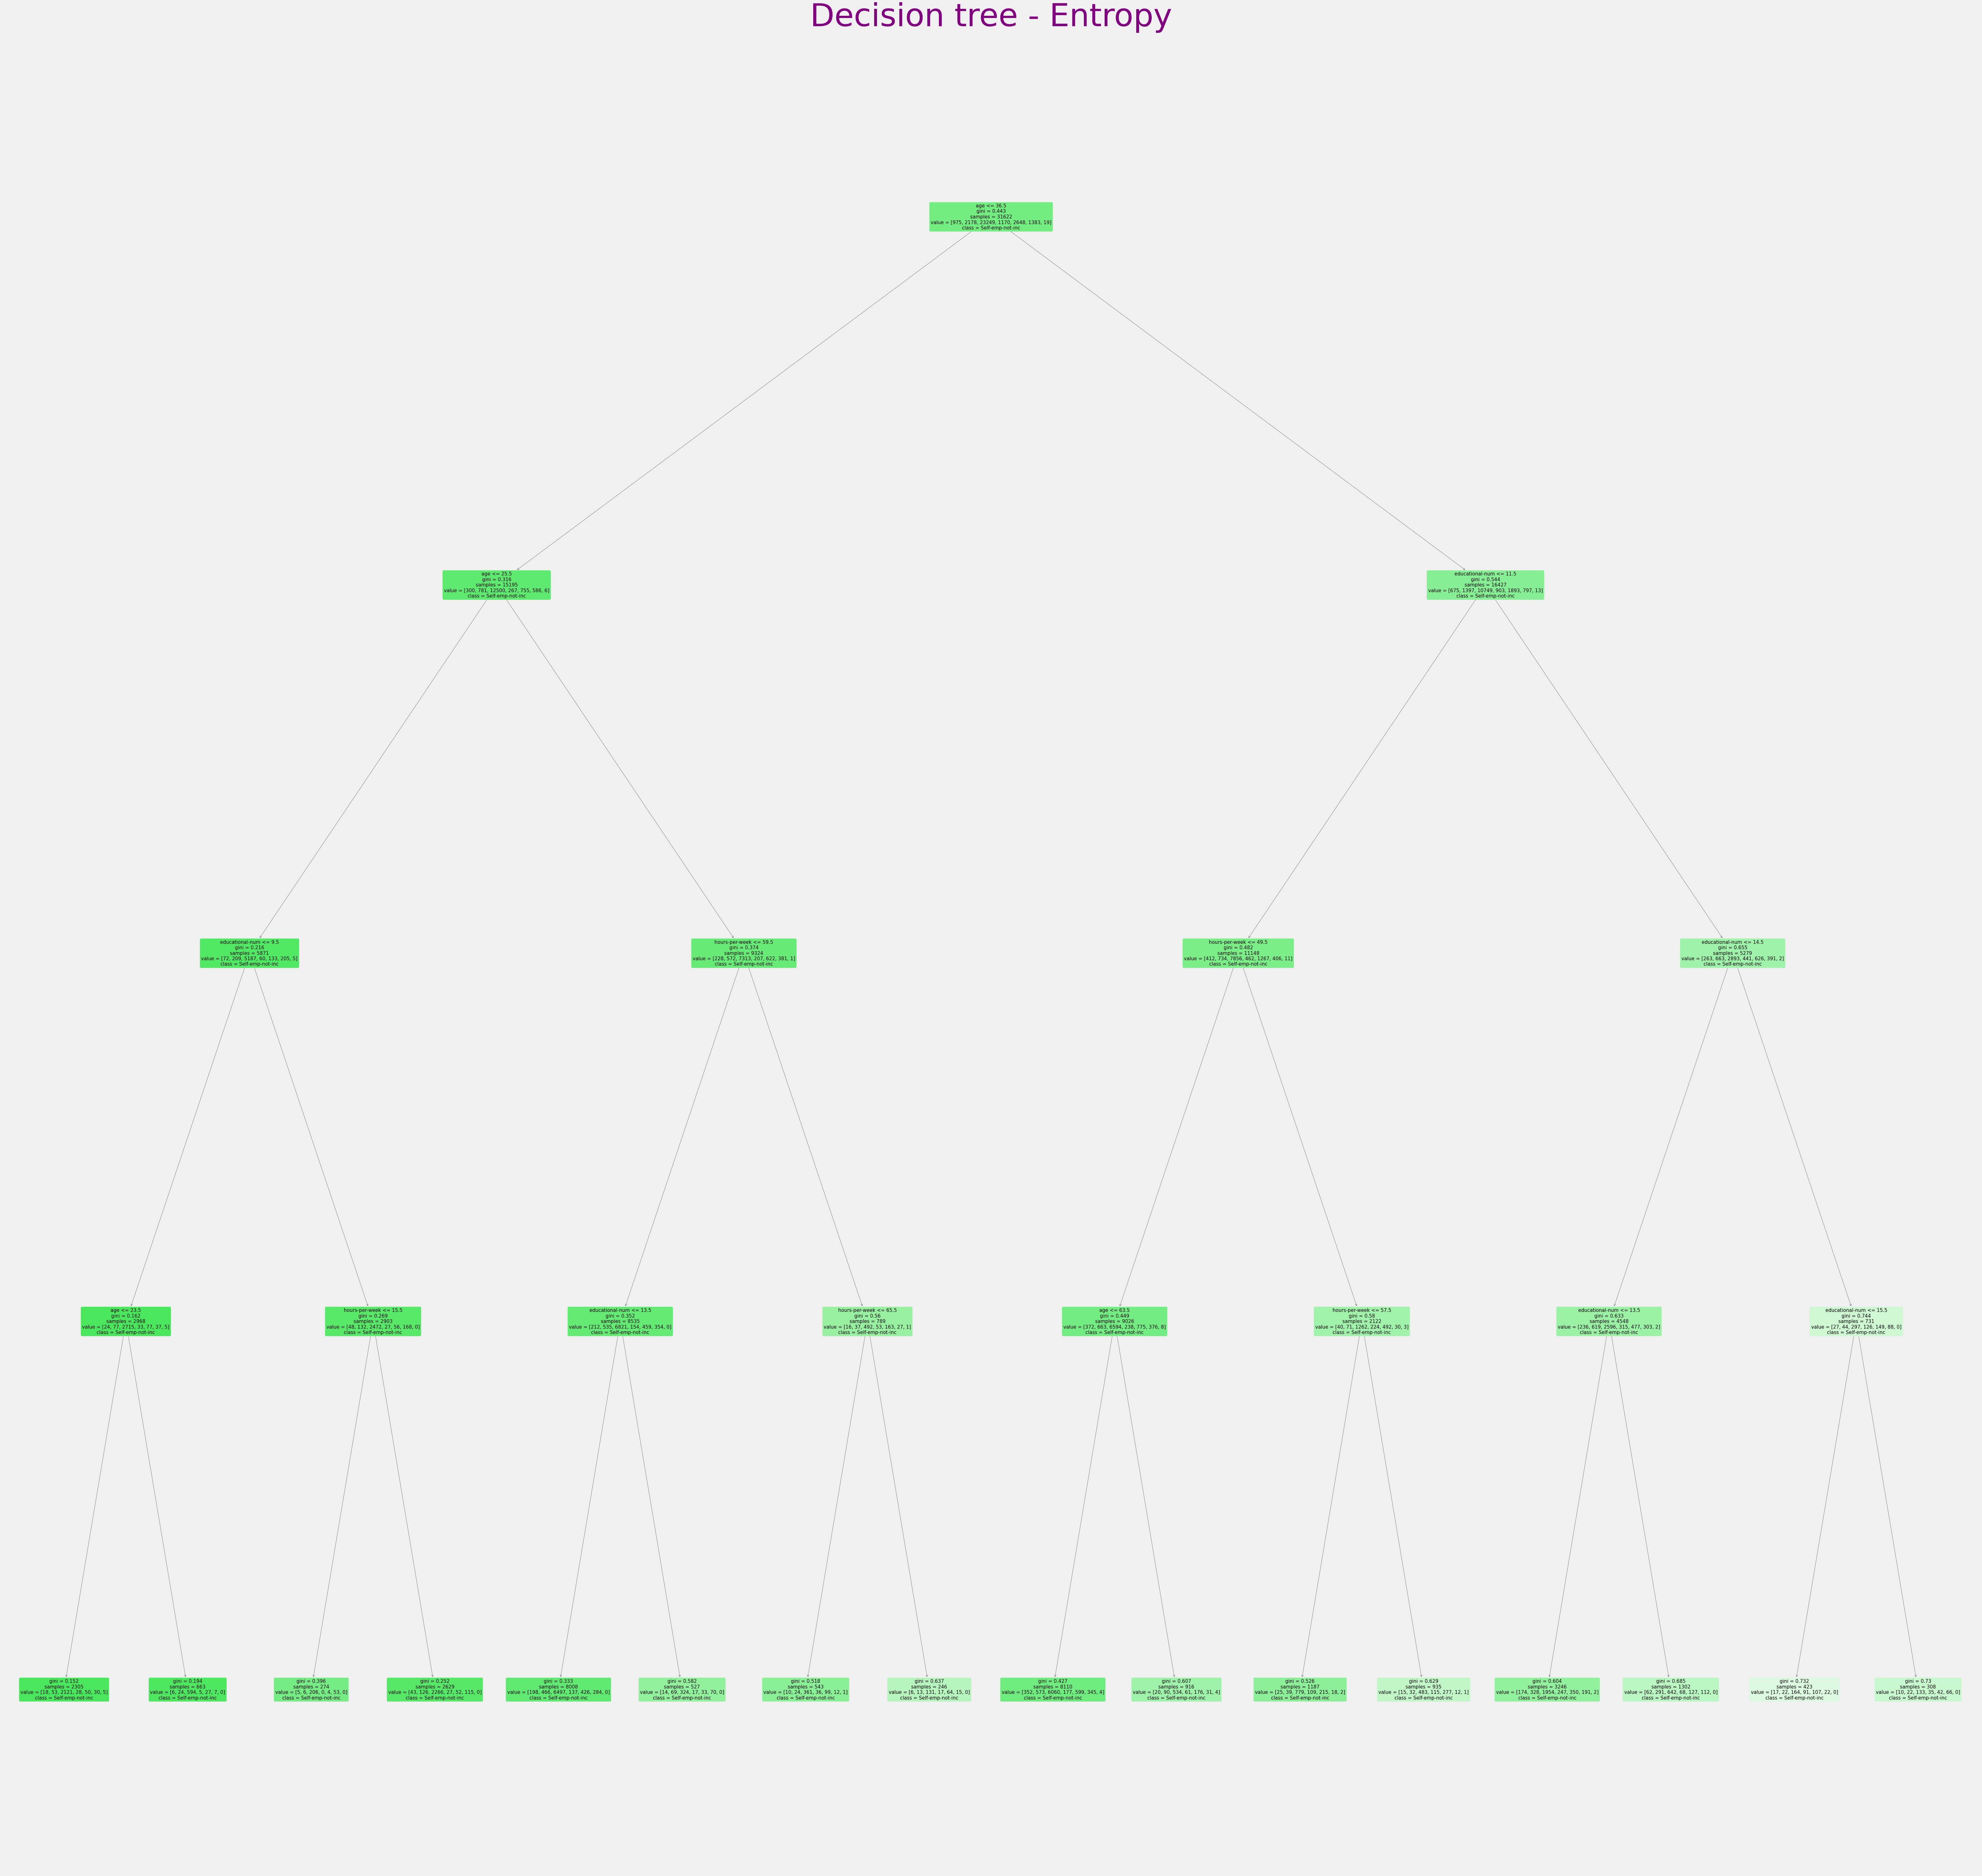

In [118]:
# Visualizing the decision tree
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(model_entropy, feature_names=dt_numeric.iloc[:,:-1].columns, class_names=dt_numeric['workclass'], filled = True)
feature_names = dt_numeric.columns[:6]
target_names = dt_numeric['workclass'].unique().tolist()
plt.figure(figsize=(100,100))
plot_tree(model_gini, feature_names = feature_names, class_names = target_names, filled = True, rounded = True)
plt.title(label="Decision tree - Entropy",fontsize=100,color="purple")
plt.savefig('DT - Entropy .png')

In [119]:
# Deriving confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))
print ("Accuracy : ", accuracy_score(y_test,predictions)*100)      
print("Report : ", classification_report(y_test, predictions))

Confusion Matrix: 
 [[    0     0   431     0     0     0     0]
 [    0     0   922     0     0     0     0]
 [    0     0 10013     0     0     0     0]
 [    0     0   475     0     0     0     0]
 [    0     0  1147     0     0     0     0]
 [    0     0   563     0     0     0     0]
 [    0     0     2     0     0     0     0]]
Accuracy :  73.88032169999262


C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report :                    precision    recall  f1-score   support

     Federal-gov       0.00      0.00      0.00       431
       Local-gov       0.00      0.00      0.00       922
         Private       0.74      1.00      0.85     10013
    Self-emp-inc       0.00      0.00      0.00       475
Self-emp-not-inc       0.00      0.00      0.00      1147
       State-gov       0.00      0.00      0.00       563
     Without-pay       0.00      0.00      0.00         2

        accuracy                           0.74     13553
       macro avg       0.11      0.14      0.12     13553
    weighted avg       0.55      0.74      0.63     13553



C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


References :- https://scikit-learn.org/stable/modules/tree.html https://www.geeksforgeeks.org/decision-tree-implementation-python/

**3. Decision Tree With Different Root Node**

In [120]:
dt_num = df[['age', 'educational-num','capital-gain', 'capital-loss','hours-per-week','workclass']]

In [121]:
dt_num.to_csv("dt_num.csv", index = False)

In [122]:
dt_num

age  educational-num  capital-gain  capital-loss  hours-per-week  \
0       25                7             0             0              40   
1       38                9             0             0              50   
2       28               12             0             0              40   
3       44               10          7688             0              40   
5       34                6             0             0              30   
...    ...              ...           ...           ...             ...   
48837   27               12             0             0              38   
48838   40                9             0             0              40   
48839   58                9             0             0              40   
48840   22                9             0             0              20   
48841   52                9         15024             0              40   

          workclass  
0           Private  
1           Private  
2         Local-gov  
3           Private  
5           Private  
...             ...  
48837       Private  
48838       Private  
48839       Private  
48840       Private  
48841  Self-emp-inc  

[45175 rows x 6 columns]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(dt_numeric.iloc[:,:-1], dt_numeric.iloc[:, -1], test_size=0.3)

In [124]:
X_train

age  educational-num  hours-per-week
22621   42               10              40
3022    61                9              40
13167   23                9              50
16840   30                7              40
19840   51               13              40
...    ...              ...             ...
168     18                9              25
17055   55                9              38
45000   25               13              40
37367   43               10              40
4903    37                9              55

[31622 rows x 3 columns]

In [125]:
X_test

age  educational-num  hours-per-week
11489   43                9              60
26738   39               11              40
27044   28               10              40
9544    60               10              40
42936   38               10              40
...    ...              ...             ...
14025   25               13              40
41433   28               15              40
29875   42               10              40
8885    55                9              45
44868   44               10              40

[13553 rows x 3 columns]

In [126]:
feature_names = dt_num.columns[:6]
target_names = dt_num['workclass'].unique().tolist()

In [127]:
model_gini = DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=3, min_samples_leaf=3)
model_gini.fit(X_train, y_train)
predictions = model_gini.predict(X_test)
predictions[1:10]

array(['Private', 'Private', 'Private', 'Private', 'Private', 'Private',
       'Private', 'Private', 'Private'], dtype=object)

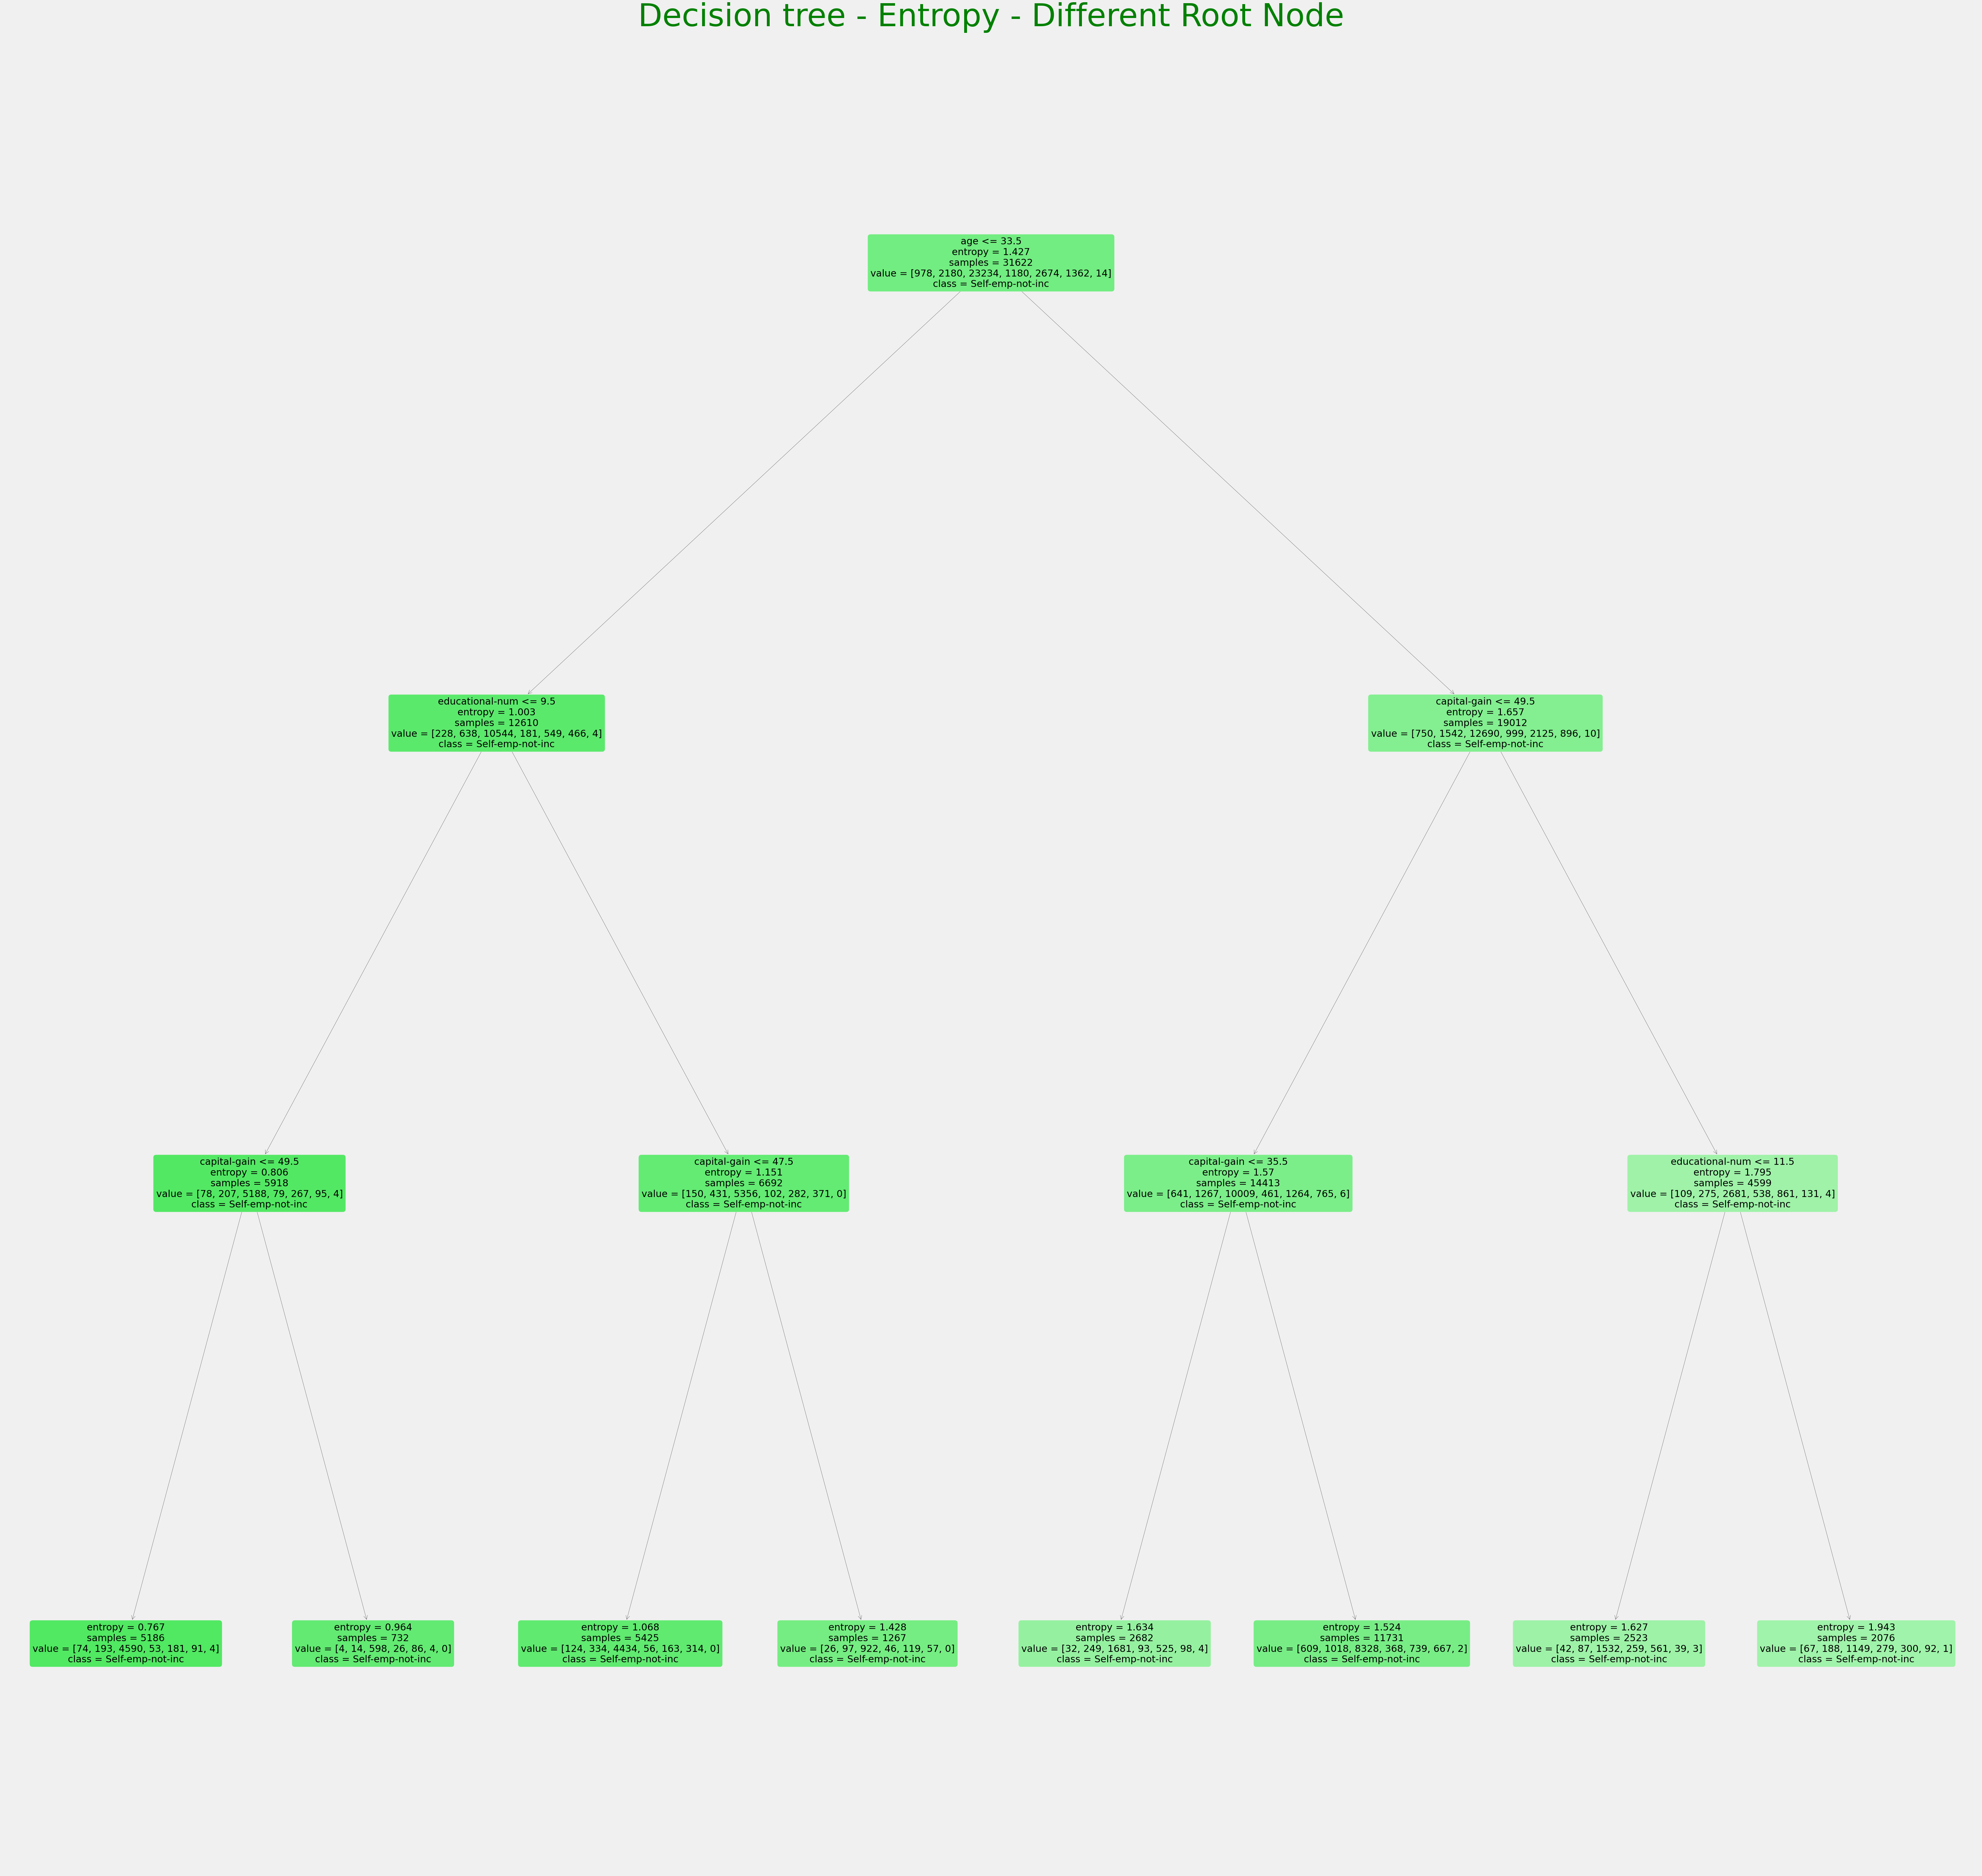

In [128]:
plt.figure(figsize=(100,100))
plot_tree(model_gini, #model
          feature_names = feature_names,  #features
          class_names = target_names, #labels
          filled = True, 
          rounded = True)
plt.title(label="Decision tree - Entropy - Different Root Node",
          fontsize=100,
          color="green")
plt.savefig('DT - Entropy - Different Root Node.png')

In [129]:
# Deriving confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))
print ("Accuracy : ", accuracy_score(y_test,predictions)*100)      
print("Report : ", classification_report(y_test, predictions))

Confusion Matrix: 
 [[    0     0   428     0     0     0     0]
 [    0     0   920     0     0     0     0]
 [    0     0 10028     0     0     0     0]
 [    0     0   465     0     0     0     0]
 [    0     0  1121     0     0     0     0]
 [    0     0   584     0     0     0     0]
 [    0     0     7     0     0     0     0]]
Accuracy :  73.99099830295876


C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report :                    precision    recall  f1-score   support

     Federal-gov       0.00      0.00      0.00       428
       Local-gov       0.00      0.00      0.00       920
         Private       0.74      1.00      0.85     10028
    Self-emp-inc       0.00      0.00      0.00       465
Self-emp-not-inc       0.00      0.00      0.00      1121
       State-gov       0.00      0.00      0.00       584
     Without-pay       0.00      0.00      0.00         7

        accuracy                           0.74     13553
       macro avg       0.11      0.14      0.12     13553
    weighted avg       0.55      0.74      0.63     13553



C:\Users\akith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
